In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [2]:
data = load_digits()
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
X = data['data']
y = data['target']


In [4]:
# no of instances for every digit
for i,c in zip(data['target_names'], np.bincount(y)):
    print(i, '', c)

0  178
1  182
2  177
3  183
4  181
5  182
6  181
7  179
8  174
9  180


In [5]:
y_imb = y.copy()

In [6]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_imb[y_imb!=1] = 0
print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_imb[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [7]:
for i,c in zip([0,1], np.bincount(y_imb)):
    print(i, '', c)

0  1615
1  182


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_imb, test_size=0.25, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=.01).fit(X_train, y_train)
svm.score(X_test, y_test)

# accuracy of this model and the dummy classifier below is exactly the same which tells us that this model has been overfitted.

0.9044444444444445

# Dummy Classifier

In [9]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
# Therefore the dummy 'most_frequent' classifier always predicts class 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy.score(X_test, y_test)

0.9044444444444445

In [10]:
for i,c in zip([0,1], np.bincount(dummy.predict(X_test))):
    print(i, '', c)

0  450


In [11]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

# Confusion matrices
# Binary (two-class) confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, recall_score,precision_score, accuracy_score, f1_score

In [13]:
print('Dummy Classifier with most frequent class predicted every time.\n', confusion_matrix(y_test, dummy.predict(X_test)))

Dummy Classifier with most frequent class predicted every time.
 [[407   0]
 [ 43   0]]


In [15]:
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)
print('Dummy Classifier which produces random predictions w/ same class proportion as training set\n', confusion_matrix(y_test, dummy_pred))

Dummy Classifier which produces random predictions w/ same class proportion as training set
 [[369  38]
 [ 41   2]]


In [16]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_pred = svm.predict(X_test)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion_matrix(y_test, svm_pred))

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [17]:
from sklearn.linear_model import LogisticRegression

ln = LogisticRegression(max_iter=20000).fit(X_train, y_train)
ln_pred = ln.predict(X_test)

print('Logistic regression classifier (default settings)\n', confusion_matrix(y_test,ln_pred))

Logistic regression classifier (default settings)
 [[403   4]
 [  7  36]]


In [18]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

print('Decision Tree Classifier (max depth=2 )\n', confusion_matrix(y_test,tree_pred))

Decision Tree Classifier (max depth=2 )
 [[400   7]
 [ 17  26]]


# Evaluation metrics for binary classification

In [19]:
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 

print('Accuracy : ', round(accuracy_score(y_test,tree_pred),2))
print('Precision: ', round(precision_score(y_test,tree_pred),2))
print('Recall\t : ', round(recall_score(y_test,tree_pred),2))
print('F1 score : ', round(f1_score(y_test,tree_pred),2))

Accuracy :  0.95
Precision:  0.79
Recall	 :  0.6
F1 score :  0.68


In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_pred, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [21]:

print('Random class-proportional (dummy)\n', 
      classification_report(y_test, dummy_pred, target_names=['not 1', '1']),'\n')
print('SVM\n', 
      classification_report(y_test, svm_pred, target_names = ['not 1', '1']),'\n')
print('Logistic regression\n', 
      classification_report(y_test, ln_pred, target_names = ['not 1', '1']),'\n')


Random class-proportional (dummy)
               precision    recall  f1-score   support

       not 1       0.90      0.91      0.90       407
           1       0.05      0.05      0.05        43

    accuracy                           0.82       450
   macro avg       0.48      0.48      0.48       450
weighted avg       0.82      0.82      0.82       450
 

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450
 

Logistic regression
               precision    recall  f1-score   support

       not 1       0.98      0.99      0.99       407
           1       0.90      0.84      0.87        43

    accuracy                           0.98       450
   macro avg       0.94      0.91      0.93       450
weighted 

# Decision Functions

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
ln = LogisticRegression().fit(X_train, y_train)

In [24]:
dec_func = ln.decision_function(X_test)

# dec_func >= 0, to predict positive instances  

In [25]:
for i,c in zip(y_test[0:20],dec_func[0:20]):
    print(i,c)

0 -29.828780122412308
0 -19.382862030530184
0 -29.198492315019383
0 -21.74628543622176
0 -22.642376912827647
0 -11.805930993502658
1 6.4960075848698615
0 -23.35461769048256
0 -27.54381690026825
0 -26.888212044652814
0 -31.86296841355937
0 -22.486081290223364
0 -25.318028584392277
0 -13.384518628616874
0 -13.565643429049114
0 -13.308352089647723
1 12.180938449259916
0 -34.362430815142936
0 -13.23154393413785
0 -29.593982949361617


In [26]:
probability = ln.predict_proba(X_test)

In [27]:
for i,c in zip(y_test[0:20],probability[0:20][:,1]):
    print(i,c)

# probability >= 0.5, to predict positive instances


0 1.110517459593521e-13
0 3.820585956448586e-09
0 2.0857195297155586e-13
0 3.595077301190379e-10
0 1.4673734251399272e-10
0 7.460124509137367e-06
1 0.9984928214717077
0 7.198108854184124e-11
0 1.091119480651798e-12
0 2.1018314238773634e-12
0 1.452408028597767e-14
0 1.7156116075914767e-10
0 1.0104617842902744e-11
0 1.5387807630727936e-06
0 1.283853169890642e-06
0 1.6605631764475244e-06
1 0.9999948727626726
0 1.1928502123299163e-15
0 1.7931338274640275e-06
0 1.404418389683268e-13


# Precision Recall curve

In [28]:
from sklearn.metrics import precision_recall_curve

In [29]:
precision,recall,threshold = precision_recall_curve(y_test, dec_func)

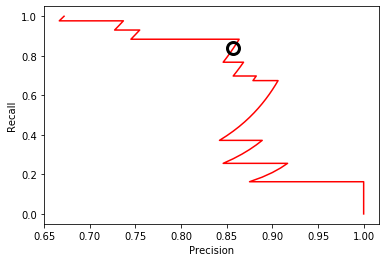

In [30]:

plt.plot(precision,recall,'r')
plt.plot(precision[np.argmin(np.abs(threshold))], recall[np.argmin(np.abs(threshold))],'o', c='k',fillstyle='none', ms=12, mew=3)
plt.ylabel('Recall')
plt.xlabel('Precision');


# ROC curves, Area-Under-Curve (AUC)

In [31]:
from sklearn.metrics import roc_curve, auc

In [32]:
fpr, tpr, _ = roc_curve(y_test, dec_func)

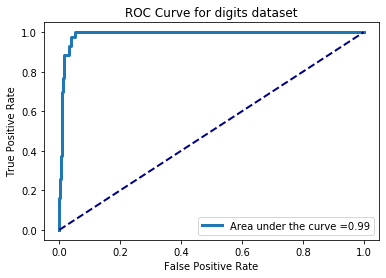

In [33]:
plt.plot(fpr,tpr, lw=3 , label='Area under the curve ={:0.2f}'.format(auc(fpr,tpr)))
plt.title('ROC Curve for digits dataset')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0,1], [0,1], color='navy', lw=2, ls='--')
plt.legend();

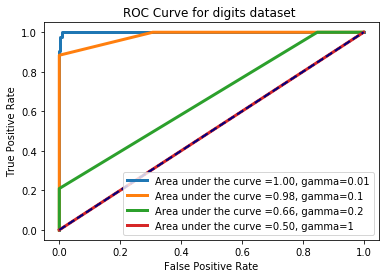

In [34]:
for g in [0.01,0.1,0.2,1]:
    svc_des = SVC(gamma = g).fit(X_train, y_train).decision_function(X_test)

    fpr_ , tpr_, __ = roc_curve(y_test, svc_des)

    plt.plot(fpr_,tpr_, lw=3, label='Area under the curve ={:0.2f}, gamma={}'.format(auc(fpr_,tpr_), g))
    plt.title('ROC Curve for digits dataset ')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.plot([0,1], [0,1], color='navy', lw=2, ls='--')
    plt.legend()
plt.show()

# Multi class confusion matrix

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

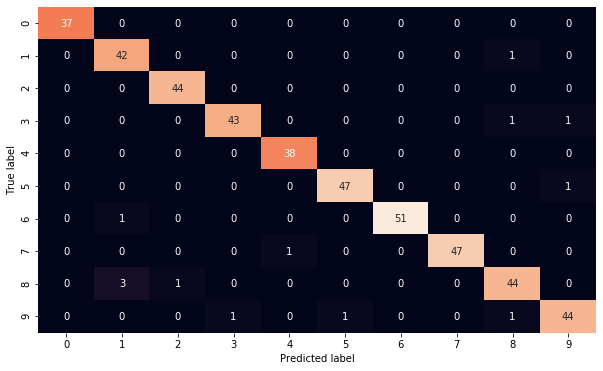

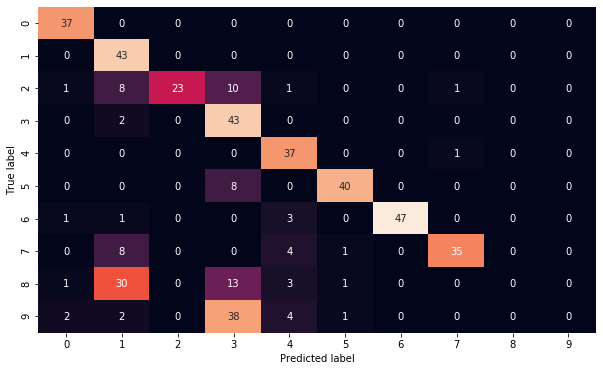

In [36]:
for i in ['linear', 'rbf']:
    svc = SVC(kernel=i, C=0.02).fit(X_train, y_train)
    svc_pred = svc.predict(X_test)
    plt.figure(figsize=(10,6))
    sns.heatmap(confusion_matrix(y_test, svc_pred), 
                xticklabels=data['target_names'],yticklabels=data['target_names'], annot=True, cbar=False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [37]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        37
           1       0.46      1.00      0.63        43
           2       1.00      0.52      0.69        44
           3       0.38      0.96      0.55        45
           4       0.71      0.97      0.82        38
           5       0.93      0.83      0.88        48
           6       1.00      0.90      0.95        52
           7       0.95      0.73      0.82        48
           8       0.00      0.00      0.00        48
           9       0.00      0.00      0.00        47

    accuracy                           0.68       450
   macro avg       0.63      0.69      0.63       450
weighted avg       0.63      0.68      0.62       450



In [38]:
# Precision
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test, svc_pred, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test, svc_pred, average = 'macro')))

Micro-averaged precision = 0.68 (treat instances equally)
Macro-averaged precision = 0.63 (treat classes equally)


In [39]:
# Recall
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(recall_score(y_test, svc_pred, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(recall_score(y_test, svc_pred, average = 'macro')))

Micro-averaged precision = 0.68 (treat instances equally)
Macro-averaged precision = 0.69 (treat classes equally)


# Regression evaluation metrics

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn import datasets

diabetes = datasets.load_diabetes()

In [43]:
diabetes['data'].shape

(442, 10)

In [52]:
X = diabetes['data'][:,6].reshape(-1,1)
y = diabetes['target']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [56]:
linreg = LinearRegression().fit(X_train, y_train)
dummy = DummyRegressor(strategy='mean').fit(X_train, y_train)

In [57]:
linreg_pred = linreg.predict(X_test)
dummy_pred = dummy.predict(X_test)

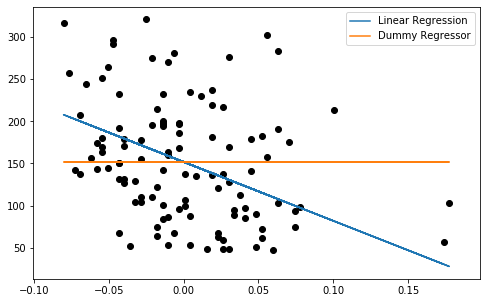

In [65]:
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='k')
plt.plot(X_test, linreg_pred, label = 'Linear Regression')
plt.plot(X_test, dummy_pred, label = 'Dummy Regressor')
plt.legend();

In [77]:
print('Linear Regression Coefficients: {}'.format(linreg.coef_))
print('R2 score Linear Regression: {:0.2f}'.format(r2_score(y_test, linreg_pred)))
print('RMSE Linear Regression: {:0.2f}'.format(np.sqrt(mean_squared_error(y_test, linreg_pred))))

print('R2 score Dummy Regressor: {:0.2f}'.format(r2_score(y_test, dummy_pred)))
print('RMSE Dummy Regressor: {:0.2f}'.format(np.sqrt(mean_squared_error(y_test, dummy_pred))))

Linear Regression Coefficients: [-698.80206267]
R2 score Linear Regression: 0.06
RMSE Linear Regression: 68.17
R2 score Dummy Regressor: -0.00
RMSE Dummy Regressor: 70.46


# Model selection using evaluation metrics
# Cross-validation example

In [82]:
from sklearn.model_selection import cross_val_score

In [84]:
X = data['data']
# y_imb

In [94]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [97]:
svc = SVC(kernel='linear')

cv=cross_val_score(svc, X, y_imb, cv=5)
cv_recall=cross_val_score(svc, X, y_imb, cv=5, scoring='recall')
cv_auc=cross_val_score(svc, X, y_imb, cv=5, scoring='roc_auc')

In [107]:
# accuracy is the default scoring metric
print('Cross-validation (acc):\t  ', cv)
# use AUC as scoring metric
print('Cross-validation (AUC):\t  ', cv_auc)
# use recall as scoring metric
print('Cross-validation (recall):', cv_recall)

Cross-validation (acc):	   [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC):	   [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-validation (recall): [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


# Grid Search 

In [108]:
from sklearn.model_selection import GridSearchCV


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y_imb, random_state=0)

In [110]:
svc = SVC(kernel='rbf')
params = {'gamma': [0.001,0.01,0.1,1,100,1000]}
grid = GridSearchCV(svc, params)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.001, 0.01, 0.1, 1, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [124]:
from sklearn.metrics import roc_auc_score

print('Best Paramter: ', grid.best_params_)
print('Accuracy: ', grid.best_score_,)
print('AUC: ', (roc_auc_score(y_test, grid.decision_function(X_test))))

Best Paramter:  {'gamma': 0.001}
Accuracy:  0.9985157648354676
AUC:  0.99982858122393


In [127]:
grid = GridSearchCV(svc, params, scoring='roc_auc')
grid.fit(X_train, y_train)
print('Best Paramter: ', grid.best_params_)
print('Best Score: ', grid.best_score_,)

Best Paramter:  {'gamma': 0.001}
Best Score:  1.0
